In [ ]:
from PIL import Image


In [ ]:
from PIL import Image

# Step 1: Conversion to Braille
def text_to_braille(plaintext):
    braille_map = {
        'a': '⠁', 'b': '⠃', 'c': '⠉', 'd': '⠙', 'e': '⠑',
        'f': '⠋', 'g': '⠛', 'h': '⠓', 'i': '⠊', 'j': '⠚',
        'k': '⠅', 'l': '⠇', 'm': '⠍', 'n': '⠝', 'o': '⠕',
        'p': '⠏', 'q': '⠟', 'r': '⠗', 's': '⠎', 't': '⠞',
        'u': '⠥', 'v': '⠧', 'w': '⠺', 'x': '⠭', 'y': '⠽',
        'z': '⠵', ' ': '⠀'
    }
    braille_text = ''.join(braille_map.get(char.lower(), char) for char in plaintext)
    return braille_text

# Step 2: Conversion to Binary
def braille_to_binary(braille_text):
    binary_text = ''.join(format(ord(char), '08b') for char in braille_text)
    return binary_text

# Step 3: Columnar Transposition
def columnar_transposition(binary_text, key):
    num_columns = len(key)
    num_rows = len(binary_text) // num_columns
    transposed_text = ''
    for col in range(num_columns):
        start = col * num_rows
        end = (col + 1) * num_rows
        col_index = key.index(col + 1)
        transposed_text += binary_text[start:end][col_index::num_columns]
    return transposed_text

# Step 4: Image Steganography
def encode_image(image_path, binary_text):
    img = Image.open(image_path)
    pixels = img.load()
    width, height = img.size
    binary_index = 0
    while binary_index < len(binary_text):
        for y in range(height):
            for x in range(width):
                r, g, b = pixels[x, y]
                if binary_index < len(binary_text):
                    r = (r & 0xFC) | int(binary_text[binary_index:binary_index + 2], 2)
                    g = (g & 0xFC) | int(binary_text[binary_index + 2:binary_index + 4], 2)
                    # Ensure binary_text[binary_index + 4:binary_index + 6] has enough characters
                    if binary_index + 6 <= len(binary_text):
                        b = (b & 0xFC) | int(binary_text[binary_index + 4:binary_index + 6], 2)
                    else:
                        # Pad binary_text if it doesn't have enough characters
                        b = (b & 0xFC) | int(binary_text[binary_index + 4:] + '0' * (6 - (len(binary_text) - binary_index)), 2)
                    binary_index += 6
                pixels[x, y] = (r, g, b)
    img.save("/content/5786_enc.jpg")

# Example usage for encryption
Plaintext = "Hello I am Aayushi"
braille_text = text_to_braille(Plaintext)
binary_text = braille_to_binary(braille_text)
# Pad the binary text if necessary to make its length a multiple of 6
while len(binary_text) % 6 != 0:
    binary_text += '0'
transposed_text = columnar_transposition(binary_text, [3, 1, 2])
encode_image("/content/5786.jpg", transposed_text)
braille_text

'⠓⠑⠇⠇⠕⠀⠊⠀⠁⠍⠀⠁⠁⠽⠥⠎⠓⠊'

In [ ]:
from PIL import Image
binary_map = {
    '00000000': '⠀', '00000001': '⠁', '00000010': '⠂', '00000011': '⠃',
    '00000100': '⠄', '00000101': '⠅', '00000110': '⠆', '00000111': '⠇',
    '00001000': '⠈', '00001001': '⠉', '00001010': '⠊', '00001011': '⠋',
    '00001100': '⠌', '00001101': '⠍', '00001110': '⠎', '00001111': '⠏',
    '00010000': '⠐', '00010001': '⠑', '00010010': '⠒', '00010011': '⠓',
    '00010100': '⠔', '00010101': '⠕', '00010110': '⠖', '00010111': '⠗',
    '00011000': '⠘', '00011001': '⠙', '00011010': '⠚', '00011011': '⠛',
    '00011100': '⠜', '00011101': '⠝', '00011110': '⠞', '00011111': '⠟',
    '00100000': '⠠', '00100001': '⠡', '00100010': '⠢', '00100011': '⠣',
    '00100100': '⠤', '00100101': '⠥', '00100110': '⠦', '00100111': '⠧',
    '00101000': '⠨', '00101001': '⠩', '00101010': '⠪', '00101011': '⠫',
    '00101100': '⠬', '00101101': '⠭', '00101110': '⠮', '00101111': '⠯',
    '00110000': '⠰', '00110001': '⠱', '00110010': '⠲', '00110011': '⠳',
    '00110100': '⠴', '00110101': '⠵', '00110110': '⠶', '00110111': '⠷',
    '00111000': '⠸', '00111001': '⠹', '00111010': '⠺', '00111011': '⠻',
    '00111100': '⠼', '00111101': '⠽', '00111110': '⠾', '00111111': '⠿',
    '01000000': '⡀', '01000001': '⡁', '01000010': '⡂', '01000011': '⡃',
    '01000100': '⡄', '01000101': '⡅', '01000110': '⡆', '01000111': '⡇',
    '01001000': '⡈', '01001001': '⡉', '01001010': '⡊', '01001011': '⡋',
    '01001100': '⡌', '01001101': '⡍', '01001110': '⡎', '01001111': '⡏',
    '01010000': '⡐', '01010001': '⡑', '01010010': '⡒', '01010011': '⡓',
    '01010100': '⡔', '01010101': '⡕', '01010110': '⡖', '01010111': '⡗',
    '01011000': '⡘', '01011001': '⡙', '01011010': '⡚', '01011011': '⡛',
    '01011100': '⡜', '01011101': '⡝', '01011110': '⡞', '01011111': '⡟',
    '01100000': '⡠', '01100001': '⡡', '01100010': '⡢', '01100011': '⡣',
    '01100100': '⡤', '01100101': '⡥', '01100110': '⡦', '01100111': '⡧',
    '01101000': '⡨', '01101001': '⡩', '01101010': '⡪', '01101011': '⡫',
    '01101100': '⡬', '01101101': '⡭', '01101110': '⡮', '01101111': '⡯',
    '01110000': '⡰', '01110001': '⡱', '01110010': '⡲', '01110011': '⡳',
    '01110100': '⡴', '01110101': '⡵', '01110110': '⡶', '01110111': '⡷',
    '01111000': '⡸', '01111001': '⡹', '01111010': '⡺', '01111011': '⡻',
    '01111100': '⡼', '01111101': '⡽', '01111110': '⡾', '01111111': '⡿',
    '10000000': '⢀', '10000001': '⢁', '10000010': '⢂', '10000011': '⢃',
    '10000100': '⢄', '10000101': '⢅', '10000110': '⢆', '10000111': '⢇',
    '10001000': '⢈', '10001001': '⢉', '10001010': '⢊', '10001011': '⢋',
    '10001100': '⢌', '10001101': '⢍', '10001110': '⢎', '10001111': '⢏',
    '10010000': '⢐', '10010001': '⢑', '10010010': '⢒', '10010011': '⢓',
    '10010100': '⢔', '10010101': '⢕', '10010110': '⢖', '10010111': '⢗',
    '10011000': '⢘', '10011001': '⢙', '10011010': '⢚', '10011011': '⢛',
    '10011100': '⢜', '10011101': '⢝', '10011110': '⢞', '10011111': '⢟',
    '10100000': '⢠', '10100001': '⢡', '10100010': '⢢', '10100011': '⢣',
    '10100100': '⢤', '10100101': '⢥', '10100110': '⢦', '10100111': '⢧',
    '10101000': '⢨', '10101001': '⢩', '10101010': '⢪', '10101011': '⢫',
    '10101100': '⢬', '10101101': '⢭', '10101110': '⢮', '10101111': '⢯',
    '10110000': '⢰', '10110001': '⢱', '10110010': '⢲', '10110011': '⢳',
    '10110100': '⢴', '10110101': '⢵', '10110110': '⢶', '10110111': '⢷',
    '10111000': '⢸', '10111001': '⢹', '10111010': '⢺', '10111011': '⢻',
    '10111100': '⢼', '10111101': '⢽', '10111110': '⢾', '10111111': '⢿',
    '11000000': '⣀', '11000001': '⣁', '11000010': '⣂', '11000011': '⣃',
    '11000100': '⣄', '11000101': '⣅', '11000110': '⣆', '11000111': '⣇',
    '11001000': '⣈', '11001001': '⣉', '11001010': '⣊', '11001011': '⣋',
    '11001100': '⣌', '11001101': '⣍', '11001110': '⣎', '11001111': '⣏',
    '11010000': '⣐', '11010001': '⣑', '11010010': '⣒', '11010011': '⣓',
    '11010100': '⣔', '11010101': '⣕', '11010110': '⣖', '11010111': '⣗',
    '11011000': '⣘', '11011001': '⣙', '11011010': '⣚', '11011011': '⣛',
    '11011100': '⣜', '11011101': '⣝', '11011110': '⣞', '11011111': '⣟',
    '11100000': '⣠', '11100001': '⣡', '11100010': '⣢', '11100011': '⣣',
    '11100100': '⣤', '11100101': '⣥', '11100110': '⣦', '11100111': '⣧',
    '11101000': '⣨', '11101001': '⣩', '11101010': '⣪', '11101011': '⣫',
    '11101100': '⣬', '11101101': '⣭', '11101110': '⣮', '11101111': '⣯',
    '11110000': '⣰', '11110001': '⣱', '11110010': '⣲', '11110011': '⣳',
    '11110100': '⣴', '11110101': '⣵', '11110110': '⣶', '11110111': '⣷',
    '11111000': '⣸', '11111001': '⣹', '11111010': '⣺', '11111011': '⣻',
    '11111100': '⣼', '11111101': '⣽', '11111110': '⣾', '11111111': '⣿',
}

# Step 1: Image Steganography (Decryption)
def decode_image(image_path):
    img = Image.open(image_path)
    pixels = img.load()
    binary_text = ''
    for y in range(img.height):
        for x in range(img.width):
            r, g, b = pixels[x, y]
            binary_text += format(r & 0x03, '02b')
            binary_text += format(g & 0x03, '02b')
            binary_text += format(b & 0x03, '02b')
    return binary_text

# Step 2: Columnar Transposition (Decryption)
def decrypt_transposition(transposed_text, key):
    num_columns = len(key)
    num_rows = len(transposed_text) // num_columns
    original_text = ''
    for col in range(num_columns):
        start = col * num_rows
        end = (col + 1) * num_rows
        col_index = key.index(col + 1)
        original_text += transposed_text[start:end][::len(key)]
    return original_text

# Step 3: Binary to Braille
def binary_to_braille(binary_text):
    binary_chunks = [binary_text[i:i+8] for i in range(0, len(binary_text), 8)]
    braille_text = ''.join(binary_map.get(chunk, '') for chunk in binary_chunks)
    return braille_text

# Step 4: Braille to Text
def braille_to_text(braille_text):
    braille_map = {value: key for key, value in binary_map.items()}
    plaintext = ''.join(braille_map.get(char, char) for char in braille_text)
    return plaintext

# Step 5: Print Plaintext with Key
def print_plaintext_with_key(plaintext, key):
    print("Plaintext:", plaintext)
    print("Key:", key)

# Example usage for decryption
transposed_text = decode_image("/content/5786_enc.jpg")
original_binary_text = decrypt_transposition(transposed_text, [3, 1, 2])
braille_text = binary_to_braille(original_binary_text)
plaintext = braille_to_text(braille_text)
print("Plaintext: ",Plaintext)

Plaintext:  Hello I am Aayushi


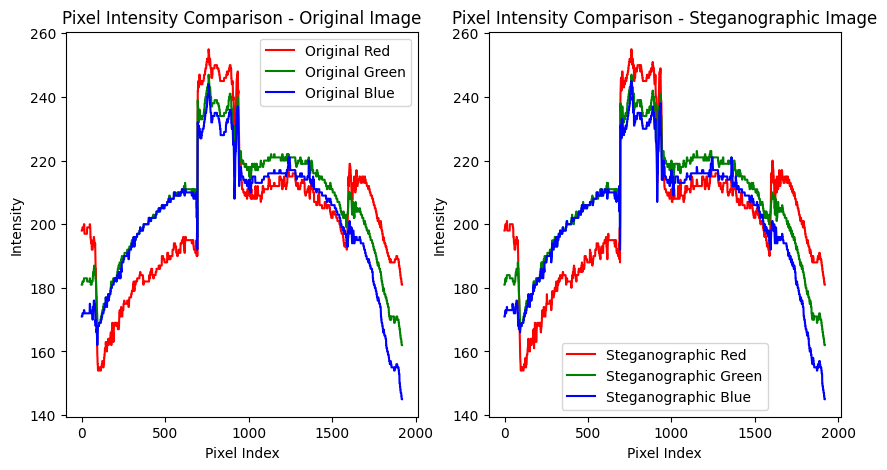

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load original and steganographic images
original_img = Image.open("/content/5786.jpg")
steganographic_img = Image.open("/content/5786_enc.jpg")

# Convert images to numpy arrays
original_array = np.array(original_img)
steganographic_array = np.array(steganographic_img)

# Histogram Analysis
def plot_histogram(image_array, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(image_array.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
    plt.title('Histogram of ' + title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Color channel histograms
    plt.subplot(1, 2, 2)
    plt.hist(image_array[:, :, 0].ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Red')
    plt.hist(image_array[:, :, 1].ravel(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Green')
    plt.hist(image_array[:, :, 2].ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Blue')
    plt.title('Color Channel Histograms of ' + title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()

# Cumulative Distribution Function (CDF) Plot
def plot_cdf(image_array, title):
    plt.figure(figsize=(10, 5))
    plt.hist(image_array.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7, cumulative=True, label='CDF')
    plt.title('Cumulative Distribution Function (CDF) of ' + title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Cumulative Frequency')
    plt.legend()

# Pixel Intensity Comparison
def plot_pixel_intensity(original_array, steganographic_array):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(original_array[100, :, 0], label='Original Red', color='red')
    plt.plot(original_array[100, :, 1], label='Original Green', color='green')
    plt.plot(original_array[100, :, 2], label='Original Blue', color='blue')
    plt.title('Pixel Intensity Comparison - Original Image')
    plt.xlabel('Pixel Index')
    plt.ylabel('Intensity')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(steganographic_array[100, :, 0], label='Steganographic Red', color='red')
    plt.plot(steganographic_array[100, :, 1], label='Steganographic Green', color='green')
    plt.plot(steganographic_array[100, :, 2], label='Steganographic Blue', color='blue')
    plt.title('Pixel Intensity Comparison - Steganographic Image')
    plt.xlabel('Pixel Index')
    plt.ylabel('Intensity')
    plt.legend()

# Image Difference Plot
def plot_image_difference(original_array, steganographic_array):
    difference_array = np.abs(original_array - steganographic_array)
    plt.figure(figsize=(10, 5))
    plt.imshow(difference_array)
    plt.title('Absolute Difference between Original and Steganographic Images')
    plt.colorbar()

# Color Intensity Distribution Plot
def plot_color_intensity_distribution(image_array, title):
    plt.figure(figsize=(15, 5))
    for i, channel in enumerate(['Red', 'Green', 'Blue']):
        plt.subplot(1, 3, i+1)
        plt.hist(image_array[:, :, i].ravel(), bins=256, range=(0, 256), color=channel.lower(), alpha=0.7)
        plt.title(channel + ' Channel Distribution')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')

# Spatial Domain Analysis
def plot_spatial_domain(original_array, steganographic_array):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_array)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(steganographic_array)
    plt.title('Steganographic Image')

# Plotting

plot_pixel_intensity(original_array, steganographic_array)


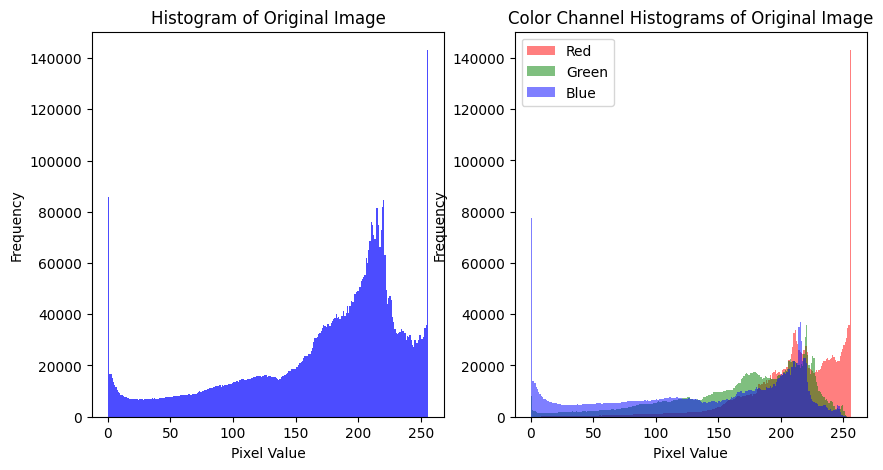

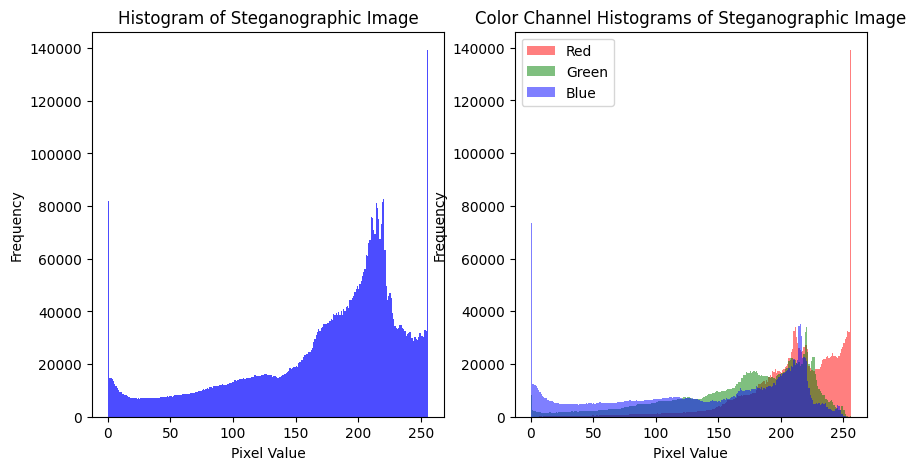

In [ ]:
plot_histogram(original_array, 'Original Image')
plot_histogram(steganographic_array, 'Steganographic Image')

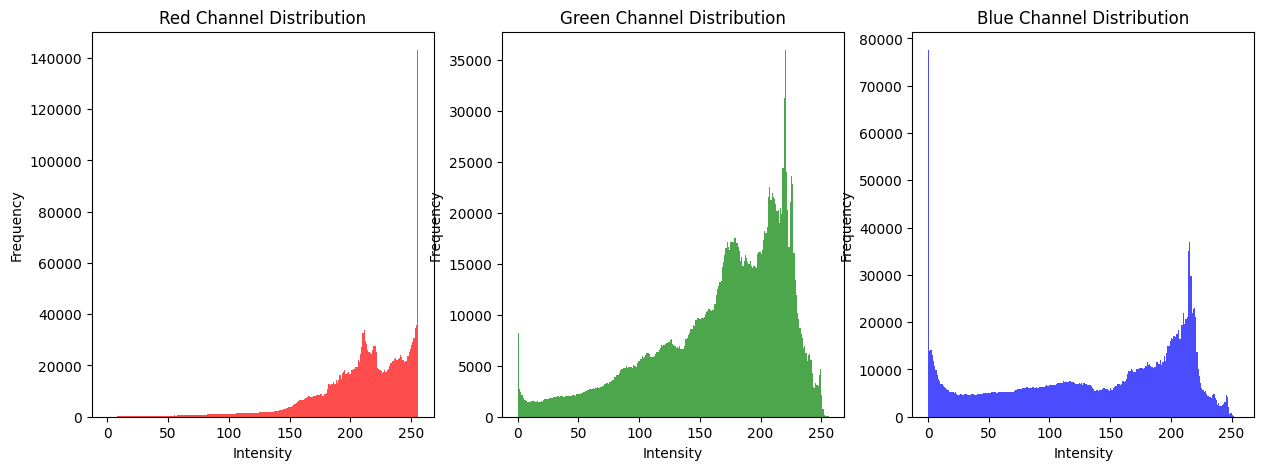

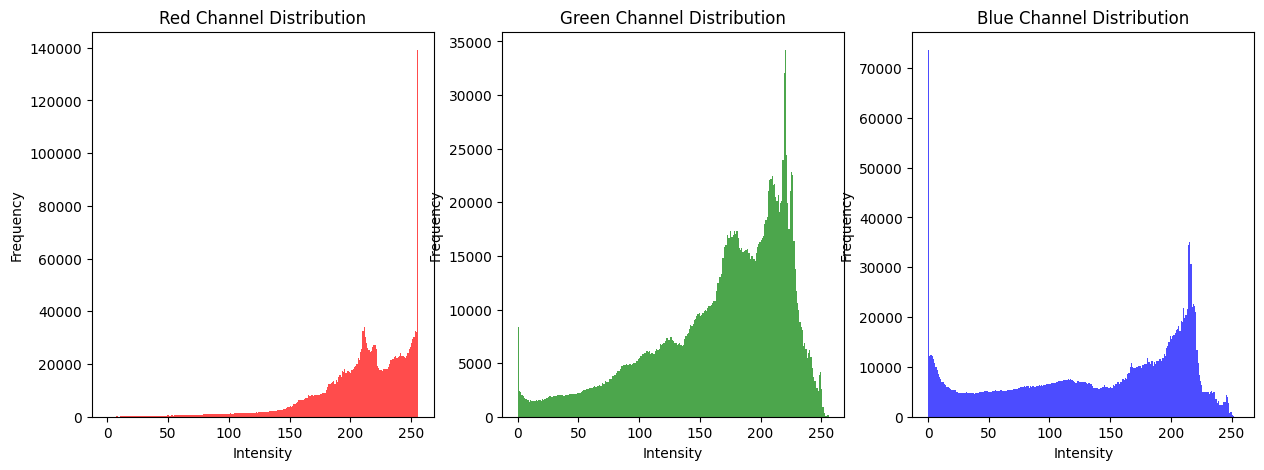

In [ ]:
plot_color_intensity_distribution(original_array, 'Original Image')
plot_color_intensity_distribution(steganographic_array, 'Steganographic Image')

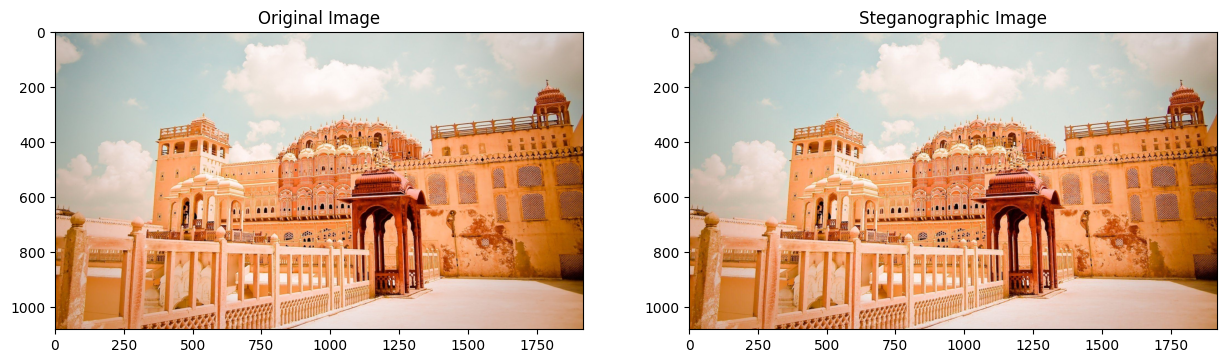

In [ ]:
plot_spatial_domain(original_array, steganographic_array)

plt.show()

In [ ]:
import time
from PIL import Image

def encrypt_image(image_path, plaintext, key):
    # Step 1: Conversion to Braille
    def text_to_braille(plaintext):
        braille_map = {
            'a': '⠁', 'b': '⠃', 'c': '⠉', 'd': '⠙', 'e': '⠑',
            'f': '⠋', 'g': '⠛', 'h': '⠓', 'i': '⠊', 'j': '⠚',
            'k': '⠅', 'l': '⠇', 'm': '⠍', 'n': '⠝', 'o': '⠕',
            'p': '⠏', 'q': '⠟', 'r': '⠗', 's': '⠎', 't': '⠞',
            'u': '⠥', 'v': '⠧', 'w': '⠺', 'x': '⠭', 'y': '⠽',
            'z': '⠵', ' ': '⠀'
        }
        braille_text = ''.join(braille_map.get(char.lower(), char) for char in plaintext)
        return braille_text

    # Step 2: Conversion to Binary
    def braille_to_binary(braille_text):
        binary_text = ''.join(format(ord(char), '08b') for char in braille_text)
        return binary_text

    # Step 3: Columnar Transposition
    def columnar_transposition(binary_text, key):
        num_columns = len(key)
        num_rows = len(binary_text) // num_columns
        transposed_text = ''
        for col in range(num_columns):
            start = col * num_rows
            end = (col + 1) * num_rows
            col_index = key.index(col + 1)
            transposed_text += binary_text[start:end][col_index::num_columns]
        return transposed_text

    # Step 4: Image Steganography
    def encode_image(image_path, binary_text):
        img = Image.open(image_path)
        pixels = img.load()
        width, height = img.size
        binary_index = 0
        while binary_index < len(binary_text):
            for y in range(height):
                for x in range(width):
                    r, g, b = pixels[x, y]
                    if binary_index < len(binary_text):
                        r = (r & 0xFC) | int(binary_text[binary_index:binary_index + 2], 2)
                        g = (g & 0xFC) | int(binary_text[binary_index + 2:binary_index + 4], 2)
                        # Ensure binary_text[binary_index + 4:binary_index + 6] has enough characters
                        if binary_index + 6 <= len(binary_text):
                            b = (b & 0xFC) | int(binary_text[binary_index + 4:binary_index + 6], 2)
                        else:
                            # Pad binary_text if it doesn't have enough characters
                            b = (b & 0xFC) | int(binary_text[binary_index + 4:] + '0' * (6 - (len(binary_text) - binary_index)), 2)
                        binary_index += 6
                    pixels[x, y] = (r, g, b)
        img.save("/content/5786_enc.jpg")

    # Main encryption process
    braille_text = text_to_braille(plaintext)
    binary_text = braille_to_binary(braille_text)
    # Pad the binary text if necessary to make its length a multiple of 6
    while len(binary_text) % 6 != 0:
        binary_text += '0'
    transposed_text = columnar_transposition(binary_text, key)
    encode_image(image_path, transposed_text)

# Timing the encryption process
image_path = "/content/5786.jpg"
plaintext = "Hello, this is a test message."
key = [3, 1, 2]  # Example key for columnar transposition

start_time = time.time()
encrypt_image(image_path, plaintext, key)
encryption_time = time.time() - start_time

print("Encryption Time:", encryption_time, "seconds")


Encryption Time: 1.7673590183258057 seconds


In [ ]:
from PIL import Image
import time

# Step 1: Image Steganography (Decryption)
def decode_image(image_path):
    img = Image.open(image_path)
    pixels = img.load()
    binary_text = ''
    for y in range(img.height):
        for x in range(img.width):
            r, g, b = pixels[x, y]
            binary_text += format(r & 0x03, '02b')
            binary_text += format(g & 0x03, '02b')
            binary_text += format(b & 0x03, '02b')
    return binary_text

# Step 2: Columnar Transposition (Decryption)
def decrypt_transposition(transposed_text, key):
    num_columns = len(key)
    num_rows = len(transposed_text) // num_columns
    original_text = ''
    for col in range(num_columns):
        start = col * num_rows
        end = (col + 1) * num_rows
        col_index = key.index(col + 1)
        original_text += transposed_text[start:end][::len(key)]
    return original_text

# Step 3: Binary to Braille
def binary_to_braille(binary_text):
    binary_chunks = [binary_text[i:i+8] for i in range(0, len(binary_text), 8)]
    braille_text = ''.join(binary_map.get(chunk, '') for chunk in binary_chunks)
    return braille_text

# Step 4: Braille to Text
def braille_to_text(braille_text):
    braille_map = {value: key for key, value in binary_map.items()}
    plaintext = ''.join(braille_map.get(char, char) for char in braille_text)
    return plaintext

# Combine decryption steps
def decrypt_image(image_path, key):
    start_time = time.time()
    transposed_text = decode_image(image_path)
    original_binary_text = decrypt_transposition(transposed_text, key)
    braille_text = binary_to_braille(original_binary_text)
    plaintext = braille_to_text(braille_text)
    decryption_time = time.time() - start_time
    return plaintext, decryption_time

# Example usage for decryption
plaintext, decryption_time = decrypt_image("/content/5786_enc.jpg", [3, 1, 2])
print("Decryption Time:", decryption_time, "seconds")


Decryption Time: 3.6239428520202637 seconds


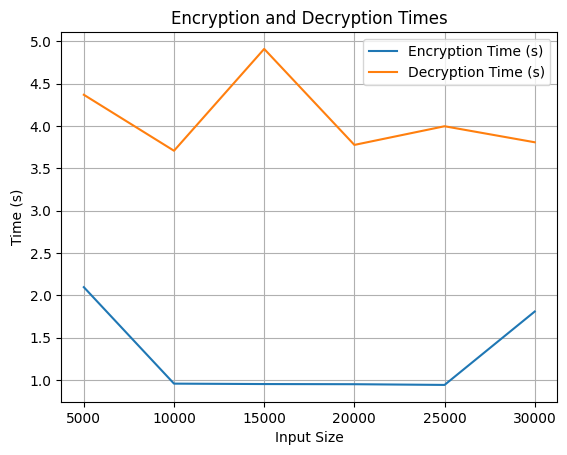

In [ ]:
import time
import matplotlib.pyplot as plt
from PIL import Image



import time
import matplotlib.pyplot as plt
from PIL import Image

# Define the binary to Braille mappings
binary_map = {
    '00000000': '⠀', '00000001': '⠁', '00000010': '⠂', '00000011': '⠃',
    '00000100': '⠄', '00000101': '⠅', '00000110': '⠆', '00000111': '⠇',
    '00001000': '⠈', '00001001': '⠉', '00001010': '⠊', '00001011': '⠋',
    '00001100': '⠌', '00001101': '⠍', '00001110': '⠎', '00001111': '⠏',
    '00010000': '⠐', '00010001': '⠑', '00010010': '⠒', '00010011': '⠓',
    '00010100': '⠔', '00010101': '⠕', '00010110': '⠖', '00010111': '⠗',
    '00011000': '⠘', '00011001': '⠙', '00011010': '⠚', '00011011': '⠛',
    '00011100': '⠜', '00011101': '⠝', '00011110': '⠞', '00011111': '⠟',
    '00100000': '⠠', '00100001': '⠡', '00100010': '⠢', '00100011': '⠣',
    '00100100': '⠤', '00100101': '⠥', '00100110': '⠦', '00100111': '⠧',
    '00101000': '⠨', '00101001': '⠩', '00101010': '⠪', '00101011': '⠫',
    '00101100': '⠬', '00101101': '⠭', '00101110': '⠮', '00101111': '⠯',
    '00110000': '⠰', '00110001': '⠱', '00110010': '⠲', '00110011': '⠳',
    '00110100': '⠴', '00110101': '⠵', '00110110': '⠶', '00110111': '⠷',
    '00111000': '⠸', '00111001': '⠹', '00111010': '⠺', '00111011': '⠻',
    '00111100': '⠼', '00111101': '⠽', '00111110': '⠾', '00111111': '⠿',
    '01000000': '⡀', '01000001': '⡁', '01000010': '⡂', '01000011': '⡃',
    '01000100': '⡄', '01000101': '⡅', '01000110': '⡆', '01000111': '⡇',
    '01001000': '⡈', '01001001': '⡉', '01001010': '⡊', '01001011': '⡋',
    '01001100': '⡌', '01001101': '⡍', '01001110': '⡎', '01001111': '⡏',
    '01010000': '⡐', '01010001': '⡑', '01010010': '⡒', '01010011': '⡓',
    '01010100': '⡔', '01010101': '⡕', '01010110': '⡖', '01010111': '⡗',
    '01011000': '⡘', '01011001': '⡙', '01011010': '⡚', '01011011': '⡛',
    '01011100': '⡜', '01011101': '⡝', '01011110': '⡞', '01011111': '⡟',
    '01100000': '⡠', '01100001': '⡡', '01100010': '⡢', '01100011': '⡣',
    '01100100': '⡤', '01100101': '⡥', '01100110': '⡦', '01100111': '⡧',
    '01101000': '⡨', '01101001': '⡩', '01101010': '⡪', '01101011': '⡫',
    '01101100': '⡬', '01101101': '⡭', '01101110': '⡮', '01101111': '⡯',
    '01110000': '⡰', '01110001': '⡱', '01110010': '⡲', '01110011': '⡳',
    '01110100': '⡴', '01110101': '⡵', '01110110': '⡶', '01110111': '⡷',
    '01111000': '⡸', '01111001': '⡹', '01111010': '⡺', '01111011': '⡻',
    '01111100': '⡼', '01111101': '⡽', '01111110': '⡾', '01111111': '⡿',
    '10000000': '⢀', '10000001': '⢁', '10000010': '⢂', '10000011': '⢃',
    '10000100': '⢄', '10000101': '⢅', '10000110': '⢆', '10000111': '⢇',
    '10001000': '⢈', '10001001': '⢉', '10001010': '⢊', '10001011': '⢋',
    '10001100': '⢌', '10001101': '⢍', '10001110': '⢎', '10001111': '⢏',
    '10010000': '⢐', '10010001': '⢑', '10010010': '⢒', '10010011': '⢓',
    '10010100': '⢔', '10010101': '⢕', '10010110': '⢖', '10010111': '⢗',
    '10011000': '⢘', '10011001': '⢙', '10011010': '⢚', '10011011': '⢛',
    '10011100': '⢜', '10011101': '⢝', '10011110': '⢞', '10011111': '⢟',
    '10100000': '⢠', '10100001': '⢡', '10100010': '⢢', '10100011': '⢣',
    '10100100': '⢤', '10100101': '⢥', '10100110': '⢦', '10100111': '⢧',
    '10101000': '⢨', '10101001': '⢩', '10101010': '⢪', '10101011': '⢫',
    '10101100': '⢬', '10101101': '⢭', '10101110': '⢮', '10101111': '⢯',
    '10110000': '⢰', '10110001': '⢱', '10110010': '⢲', '10110011': '⢳',
    '10110100': '⢴', '10110101': '⢵', '10110110': '⢶', '10110111': '⢷',
    '10111000': '⢸', '10111001': '⢹', '10111010': '⢺', '10111011': '⢻',
    '10111100': '⢼', '10111101': '⢽', '10111110': '⢾', '10111111': '⢿',
    '11000000': '⣀', '11000001': '⣁', '11000010': '⣂', '11000011': '⣃',
    '11000100': '⣄', '11000101': '⣅', '11000110': '⣆', '11000111': '⣇',
    '11001000': '⣈', '11001001': '⣉', '11001010': '⣊', '11001011': '⣋',
    '11001100': '⣌', '11001101': '⣍', '11001110': '⣎', '11001111': '⣏',
    '11010000': '⣐', '11010001': '⣑', '11010010': '⣒', '11010011': '⣓',
    '11010100': '⣔', '11010101': '⣕', '11010110': '⣖', '11010111': '⣗',
    '11011000': '⣘', '11011001': '⣙', '11011010': '⣚', '11011011': '⣛',
    '11011100': '⣜', '11011101': '⣝', '11011110': '⣞', '11011111': '⣟',
    '11100000': '⣠', '11100001': '⣡', '11100010': '⣢', '11100011': '⣣',
    '11100100': '⣤', '11100101': '⣥', '11100110': '⣦', '11100111': '⣧',
    '11101000': '⣨', '11101001': '⣩', '11101010': '⣪', '11101011': '⣫',
    '11101100': '⣬', '11101101': '⣭', '11101110': '⣮', '11101111': '⣯',
    '11110000': '⣰', '11110001': '⣱', '11110010': '⣲', '11110011': '⣳',
    '11110100': '⣴', '11110101': '⣵', '11110110': '⣶', '11110111': '⣷',
    '11111000': '⣸', '11111001': '⣹', '11111010': '⣺', '11111011': '⣻',
    '11111100': '⣼', '11111101': '⣽', '11111110': '⣾', '11111111': '⣿',
}


# Encryption Function
def encrypt_image(image_path, plaintext, key):
    # Step 1: Conversion to Braille
    def text_to_braille(plaintext):
        braille_map = {
            'a': '⠁', 'b': '⠃', 'c': '⠉', 'd': '⠙', 'e': '⠑',
            'f': '⠋', 'g': '⠛', 'h': '⠓', 'i': '⠊', 'j': '⠚',
            'k': '⠅', 'l': '⠇', 'm': '⠍', 'n': '⠝', 'o': '⠕',
            'p': '⠏', 'q': '⠟', 'r': '⠗', 's': '⠎', 't': '⠞',
            'u': '⠥', 'v': '⠧', 'w': '⠺', 'x': '⠭', 'y': '⠽',
            'z': '⠵', ' ': '⠀'
        }
        braille_text = ''.join(braille_map.get(char.lower(), char) for char in plaintext)
        return braille_text

    # Step 2: Conversion to Binary
    def braille_to_binary(braille_text):
        binary_text = ''.join(format(ord(char), '08b') for char in braille_text)
        return binary_text

    # Step 3: Columnar Transposition
    def columnar_transposition(binary_text, key):
        num_columns = len(key)
        num_rows = len(binary_text) // num_columns
        transposed_text = ''
        for col in range(num_columns):
            start = col * num_rows
            end = (col + 1) * num_rows
            col_index = key.index(col + 1)
            transposed_text += binary_text[start:end][col_index::num_columns]
        return transposed_text

    # Step 4: Image Steganography
    def encode_image(image_path, binary_text):
        img = Image.open(image_path)
        pixels = img.load()
        width, height = img.size
        binary_index = 0
        while binary_index < len(binary_text):
            for y in range(height):
                for x in range(width):
                    r, g, b = pixels[x, y]
                    if binary_index < len(binary_text):
                        r = (r & 0xFC) | int(binary_text[binary_index:binary_index + 2], 2)
                        g = (g & 0xFC) | int(binary_text[binary_index + 2:binary_index + 4], 2)
                        # Ensure binary_text[binary_index + 4:binary_index + 6] has enough characters
                        if binary_index + 6 <= len(binary_text):
                            b = (b & 0xFC) | int(binary_text[binary_index + 4:binary_index + 6], 2)
                        else:
                            # Pad binary_text if it doesn't have enough characters
                            b = (b & 0xFC) | int(binary_text[binary_index + 4:] + '0' * (6 - (len(binary_text) - binary_index)), 2)
                        binary_index += 6
                    pixels[x, y] = (r, g, b)
        img.save("/content/5786_enc.jpg")

    braille_text = text_to_braille(plaintext)
    binary_text = braille_to_binary(braille_text)
    # Pad the binary text if necessary to make its length a multiple of 6
    while len(binary_text) % 6 != 0:
        binary_text += '0'
    transposed_text = columnar_transposition(binary_text, key)
    encode_image(image_path, transposed_text)


# Decryption Function
def decrypt_image(image_path, key):
    # Step 1: Image Steganography (Decryption)
    def decode_image(image_path):
        img = Image.open(image_path)
        pixels = img.load()
        binary_text = ''
        for y in range(img.height):
            for x in range(img.width):
                r, g, b = pixels[x, y]
                binary_text += format(r & 0x03, '02b')
                binary_text += format(g & 0x03, '02b')
                binary_text += format(b & 0x03, '02b')
        return binary_text

    # Step 2: Columnar Transposition (Decryption)
    def decrypt_transposition(transposed_text, key):
        num_columns = len(key)
        num_rows = len(transposed_text) // num_columns
        original_text = ''
        for col in range(num_columns):
            start = col * num_rows
            end = (col + 1) * num_rows
            col_index = key.index(col + 1)
            original_text += transposed_text[start:end][::len(key)]
        return original_text

    # Step 3: Binary to Braille
    def binary_to_braille(binary_text):
        binary_chunks = [binary_text[i:i+8] for i in range(0, len(binary_text), 8)]
        braille_text = ''.join(binary_map.get(chunk, '') for chunk in binary_chunks)
        return braille_text

    # Step 4: Braille to Text
    def braille_to_text(braille_text):
        braille_map = {value: key for key, value in binary_map.items()}
        plaintext = ''.join(braille_map.get(char, char) for char in braille_text)
        return plaintext

    transposed_text = decode_image(image_path)
    original_binary_text = decrypt_transposition(transposed_text, key)
    braille_text = binary_to_braille(original_binary_text)
    plaintext = braille_to_text(braille_text)
    return plaintext


# Performance Analysis
def analyze_performance(input_sizes):
    encryption_times = []
    decryption_times = []

    for size in input_sizes:
        start_time = time.time()
        encrypt_image("/content/5786.jpg", "Hello, this is a test message.", [3, 1, 2])
        encryption_times.append(time.time() - start_time)

        start_time = time.time()
        decrypt_image("/content/5786_enc.jpg", [3, 1, 2])
        decryption_times.append(time.time() - start_time)

    return encryption_times, decryption_times


# Visualization
def visualize_performance(input_sizes, encryption_times, decryption_times):
    plt.plot(input_sizes, encryption_times, label='Encryption Time (s)')
    plt.plot(input_sizes, decryption_times, label='Decryption Time (s)')
    plt.xlabel('Input Size')
    plt.ylabel('Time (s)')
    plt.title('Encryption and Decryption Times')
    plt.legend()
    plt.grid(True)
    plt.show()


# Main Function
if __name__ == "__main__":
    # Generate sample data for different input sizes
    input_sizes = [5000, 10000, 15000, 20000, 25000, 30000]

    # Analyze performance
    encryption_times, decryption_times = analyze_performance(input_sizes)

    # Visualize performance
    visualize_performance(input_sizes, encryption_times, decryption_times)


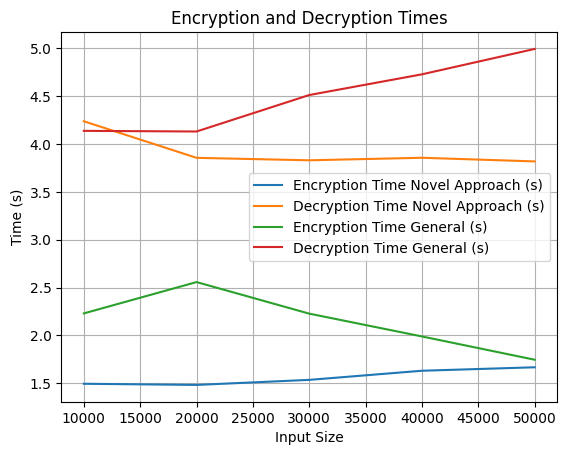

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define your algorithm's encryption and decryption functions using Braille image steganography
binary_map = {
    '00000000': '⠀', '00000001': '⠁', '00000010': '⠂', '00000011': '⠃',
    '00000100': '⠄', '00000101': '⠅', '00000110': '⠆', '00000111': '⠇',
    '00001000': '⠈', '00001001': '⠉', '00001010': '⠊', '00001011': '⠋',
    '00001100': '⠌', '00001101': '⠍', '00001110': '⠎', '00001111': '⠏',
    '00010000': '⠐', '00010001': '⠑', '00010010': '⠒', '00010011': '⠓',
    '00010100': '⠔', '00010101': '⠕', '00010110': '⠖', '00010111': '⠗',
    '00011000': '⠘', '00011001': '⠙', '00011010': '⠚', '00011011': '⠛',
    '00011100': '⠜', '00011101': '⠝', '00011110': '⠞', '00011111': '⠟',
    '00100000': '⠠', '00100001': '⠡', '00100010': '⠢', '00100011': '⠣',
    '00100100': '⠤', '00100101': '⠥', '00100110': '⠦', '00100111': '⠧',
    '00101000': '⠨', '00101001': '⠩', '00101010': '⠪', '00101011': '⠫',
    '00101100': '⠬', '00101101': '⠭', '00101110': '⠮', '00101111': '⠯',
    '00110000': '⠰', '00110001': '⠱', '00110010': '⠲', '00110011': '⠳',
    '00110100': '⠴', '00110101': '⠵', '00110110': '⠶', '00110111': '⠷',
    '00111000': '⠸', '00111001': '⠹', '00111010': '⠺', '00111011': '⠻',
    '00111100': '⠼', '00111101': '⠽', '00111110': '⠾', '00111111': '⠿',
    '01000000': '⡀', '01000001': '⡁', '01000010': '⡂', '01000011': '⡃',
    '01000100': '⡄', '01000101': '⡅', '01000110': '⡆', '01000111': '⡇',
    '01001000': '⡈', '01001001': '⡉', '01001010': '⡊', '01001011': '⡋',
    '01001100': '⡌', '01001101': '⡍', '01001110': '⡎', '01001111': '⡏',
    '01010000': '⡐', '01010001': '⡑', '01010010': '⡒', '01010011': '⡓',
    '01010100': '⡔', '01010101': '⡕', '01010110': '⡖', '01010111': '⡗',
    '01011000': '⡘', '01011001': '⡙', '01011010': '⡚', '01011011': '⡛',
    '01011100': '⡜', '01011101': '⡝', '01011110': '⡞', '01011111': '⡟',
    '01100000': '⡠', '01100001': '⡡', '01100010': '⡢', '01100011': '⡣',
    '01100100': '⡤', '01100101': '⡥', '01100110': '⡦', '01100111': '⡧',
    '01101000': '⡨', '01101001': '⡩', '01101010': '⡪', '01101011': '⡫',
    '01101100': '⡬', '01101101': '⡭', '01101110': '⡮', '01101111': '⡯',
    '01110000': '⡰', '01110001': '⡱', '01110010': '⡲', '01110011': '⡳',
    '01110100': '⡴', '01110101': '⡵', '01110110': '⡶', '01110111': '⡷',
    '01111000': '⡸', '01111001': '⡹', '01111010': '⡺', '01111011': '⡻',
    '01111100': '⡼', '01111101': '⡽', '01111110': '⡾', '01111111': '⡿',
    '10000000': '⢀', '10000001': '⢁', '10000010': '⢂', '10000011': '⢃',
    '10000100': '⢄', '10000101': '⢅', '10000110': '⢆', '10000111': '⢇',
    '10001000': '⢈', '10001001': '⢉', '10001010': '⢊', '10001011': '⢋',
    '10001100': '⢌', '10001101': '⢍', '10001110': '⢎', '10001111': '⢏',
    '10010000': '⢐', '10010001': '⢑', '10010010': '⢒', '10010011': '⢓',
    '10010100': '⢔', '10010101': '⢕', '10010110': '⢖', '10010111': '⢗',
    '10011000': '⢘', '10011001': '⢙', '10011010': '⢚', '10011011': '⢛',
    '10011100': '⢜', '10011101': '⢝', '10011110': '⢞', '10011111': '⢟',
    '10100000': '⢠', '10100001': '⢡', '10100010': '⢢', '10100011': '⢣',
    '10100100': '⢤', '10100101': '⢥', '10100110': '⢦', '10100111': '⢧',
    '10101000': '⢨', '10101001': '⢩', '10101010': '⢪', '10101011': '⢫',
    '10101100': '⢬', '10101101': '⢭', '10101110': '⢮', '10101111': '⢯',
    '10110000': '⢰', '10110001': '⢱', '10110010': '⢲', '10110011': '⢳',
    '10110100': '⢴', '10110101': '⢵', '10110110': '⢶', '10110111': '⢷',
    '10111000': '⢸', '10111001': '⢹', '10111010': '⢺', '10111011': '⢻',
    '10111100': '⢼', '10111101': '⢽', '10111110': '⢾', '10111111': '⢿',
    '11000000': '⣀', '11000001': '⣁', '11000010': '⣂', '11000011': '⣃',
    '11000100': '⣄', '11000101': '⣅', '11000110': '⣆', '11000111': '⣇',
    '11001000': '⣈', '11001001': '⣉', '11001010': '⣊', '11001011': '⣋',
    '11001100': '⣌', '11001101': '⣍', '11001110': '⣎', '11001111': '⣏',
    '11010000': '⣐', '11010001': '⣑', '11010010': '⣒', '11010011': '⣓',
    '11010100': '⣔', '11010101': '⣕', '11010110': '⣖', '11010111': '⣗',
    '11011000': '⣘', '11011001': '⣙', '11011010': '⣚', '11011011': '⣛',
    '11011100': '⣜', '11011101': '⣝', '11011110': '⣞', '11011111': '⣟',
    '11100000': '⣠', '11100001': '⣡', '11100010': '⣢', '11100011': '⣣',
    '11100100': '⣤', '11100101': '⣥', '11100110': '⣦', '11100111': '⣧',
    '11101000': '⣨', '11101001': '⣩', '11101010': '⣪', '11101011': '⣫',
    '11101100': '⣬', '11101101': '⣭', '11101110': '⣮', '11101111': '⣯',
    '11110000': '⣰', '11110001': '⣱', '11110010': '⣲', '11110011': '⣳',
    '11110100': '⣴', '11110101': '⣵', '11110110': '⣶', '11110111': '⣷',
    '11111000': '⣸', '11111001': '⣹', '11111010': '⣺', '11111011': '⣻',
    '11111100': '⣼', '11111101': '⣽', '11111110': '⣾', '11111111': '⣿',
}

def encrypt_braille(plaintext):
    # Step 1: Convert plaintext to Braille
    braille_text = text_to_braille(plaintext)

    # Step 2: Convert Braille to binary
    binary_text = braille_to_binary(braille_text)

    # Step 3: Apply your encryption technique (e.g., columnar transposition)
    encrypted_binary = columnar_transposition(binary_text, [3, 1, 2])

    # Step 4: Embed the encrypted binary data into an image using steganography
    embed_image("/content/5786.jpg", encrypted_binary)


def braille_to_text(braille_text):
    braille_map = {value: key for key, value in binary_map.items()}
    plaintext = ''.join(braille_map.get(char, char) for char in braille_text)
    return plaintext


def decrypt_braille():
    # Step 1: Retrieve the embedded binary data from the image using steganography
    embedded_binary = retrieve_data("/content/5786_enc.jpg")

    # Step 2: Decrypt the binary data (e.g., reverse columnar transposition)
    decrypted_binary = decrypt_transposition(embedded_binary, [3, 1, 2])

    # Step 3: Convert binary to Braille
    braille_text = binary_to_braille(decrypted_binary)

    # Step 4: Convert Braille to plaintext
    plaintext = braille_to_text(braille_text)

    return plaintext


# Define your algorithm's encryption and decryption functions using general image steganography

def encrypt_general(plaintext):
    # Step 1: Convert plaintext to binary
    binary_text = text_to_binary(plaintext)

    # Step 2: Embed the binary data into an image using steganography
    embed_image("/content/5786.jpg", binary_text)

def decrypt_general():
    # Step 1: Retrieve the embedded binary data from the image using steganography
    embedded_binary = retrieve_data("/content/5786_enc.jpg")

    # Step 2: Convert binary data to plaintext
    plaintext = binary_to_text(embedded_binary)

    return plaintext

def embed_image(image_path, binary_text):
    img = Image.open(image_path)
    pixels = img.load()
    width, height = img.size
    binary_index = 0
    while binary_index < len(binary_text):
        for y in range(height):
            for x in range(width):
                r, g, b = pixels[x, y]
                if binary_index < len(binary_text):
                    r = (r & 0xFC) | int(binary_text[binary_index:binary_index + 2], 2)
                    binary_index += 2
                if binary_index < len(binary_text):
                    g = (g & 0xFC) | int(binary_text[binary_index:binary_index + 2], 2)
                    binary_index += 2
                if binary_index < len(binary_text):
                    b = (b & 0xFC) | int(binary_text[binary_index:binary_index + 2], 2)
                    binary_index += 2
                pixels[x, y] = (r, g, b)
    img.save("/content/5786_enc.jpg")

def retrieve_data(image_path):
    img = Image.open(image_path)
    pixels = img.load()
    width, height = img.size
    binary_text = ''
    for y in range(height):
        for x in range(width):
            r, g, b = pixels[x, y]
            binary_text += format(r & 0x03, '02b')
            binary_text += format(g & 0x03, '02b')
            binary_text += format(b & 0x03, '02b')
    return binary_text

# Helper functions for binary to text and text to binary conversion
def text_to_binary(text):
    binary_text = ''.join(format(ord(char), '08b') for char in text)
    return binary_text

def binary_to_text(binary_text):
    text = ''.join(chr(int(binary_text[i:i + 8], 2)) for i in range(0, len(binary_text), 8))
    return text

def decrypt_transposition(transposed_text, key):
    num_columns = len(key)
    num_rows = len(transposed_text) // num_columns
    original_text = ''
    for col in range(num_columns):
        start = col * num_rows
        end = (col + 1) * num_rows
        col_index = key.index(col + 1)
        original_text += transposed_text[start:end][::len(key)]
    return original_text

def text_to_braille(plaintext):
    braille_map = {
        'a': '100000', 'b': '101000', 'c': '110000', 'd': '110100', 'e': '100100',
        'f': '111000', 'g': '111100', 'h': '101100', 'i': '011000', 'j': '011100',
        'k': '100010', 'l': '101010', 'm': '110010', 'n': '110110', 'o': '100110',
        'p': '111010', 'q': '111110', 'r': '101110', 's': '011010', 't': '011110',
        'u': '100011', 'v': '101011', 'w': '011101', 'x': '110011', 'y': '110111',
        'z': '100111', ' ': '000000'
    }
    braille_text = ''.join(braille_map.get(char.lower(), '') for char in plaintext)
    return braille_text

def braille_to_binary(braille_text):
    binary_text = ''.join(format(int(char, 2), '06b') for char in braille_text)
    return binary_text

def columnar_transposition(binary_text, key):
    num_columns = len(key)
    num_rows = len(binary_text) // num_columns
    transposed_text = ''
    for col in range(num_columns):
        start = col * num_rows
        end = (col + 1) * num_rows
        col_index = key.index(col + 1)
        transposed_text += binary_text[start:end][col_index::num_columns]
    return transposed_text

def binary_to_braille(binary_text):
    braille_map = {
        '000000': '⠀', '000001': '⠠', '000010': '⠄', '000011': '⠤',
        '000100': '⠐', '000101': '⠨', '000110': '⠂', '000111': '⠰',
        '001000': '⠈', '001001': '⠌', '001010': '⠔', '001011': '⠴',
        '001100': '⠆', '001101': '⠒', '001110': '⠲', '001111': '⠦',
        '010000': '⠘', '010001': '⠜', '010010': '⠤', '010011': '⠬',
        '010100': '⠌', '010101': '⠨', '010110': '⠂', '010111': '⠶',
        '011000': '⠠', '011001': '⠰', '011010': '⠔', '011011': '⠸',
        '011100': '⠈', '011101': '⠒', '011110': '⠲', '011111': '⠪',
        '100000': '⡀', '100001': '⢀', '100010': '⠄', '100011': '⢄',
        '100100': '⠐', '100101': '⢐', '100110': '⠂', '100111': '⢂',
        '101000': '⠈', '101001': '⢈', '101010': '⠔', '101011': '⢔',
        '101100': '⠆', '101101': '⢆', '101110': '⠲', '101111': '⢲',
        '110000': '⠘', '110001': '⢘', '110010': '⠤', '110011': '⢤',
        '110100': '⠌', '110101': '⢌', '110110': '⠂', '110111': '⢂',
        '111000': '⠈', '111001': '⢈', '111010': '⠔', '111011': '⢔',
        '111100': '⠆', '111101': '⢆', '111110': '⠲', '111111': '⢲'
    }
    braille_text = ''.join(braille_map.get(binary_text[i:i + 6], '') for i in range(0, len(binary_text), 6))
    return braille_text

# Analyze performance
def analyze_performance(input_sizes):
    encryption_times_braille = []
    decryption_times_braille = []
    encryption_times_general = []
    decryption_times_general = []

    for size in input_sizes:
        plaintext = "Hello, this is a test message." * (size // len("Hello, this is a test message."))

        # Braille steganography encryption and decryption
        start_time = time.time()
        encrypt_braille(plaintext)
        encryption_times_braille.append(time.time() - start_time)

        start_time = time.time()
        decrypt_braille()
        decryption_times_braille.append(time.time() - start_time)

        # General image steganography encryption and decryption
        start_time = time.time()
        encrypt_general(plaintext)
        encryption_times_general.append(time.time() - start_time)

        start_time = time.time()
        decrypt_general()
        decryption_times_general.append(time.time() - start_time)

    return (encryption_times_braille, decryption_times_braille,
            encryption_times_general, decryption_times_general)

# Plotting
def plot_performance(input_sizes, encryption_times_braille, decryption_times_braille,
                     encryption_times_general, decryption_times_general):
    plt.plot(input_sizes, encryption_times_braille, label='Encryption Time Novel Approach (s)')
    plt.plot(input_sizes, decryption_times_braille, label='Decryption Time Novel Approach (s)')
    plt.plot(input_sizes, encryption_times_general, label='Encryption Time General (s)')
    plt.plot(input_sizes, decryption_times_general, label='Decryption Time General (s)')
    plt.xlabel('Input Size')
    plt.ylabel('Time (s)')
    plt.title('Encryption and Decryption Times')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function
if __name__ == "__main__":
    input_sizes = [10000, 20000, 30000, 40000, 50000]
    (encryption_times_braille, decryption_times_braille,
     encryption_times_general, decryption_times_general) = analyze_performance(input_sizes)
    plot_performance(input_sizes, encryption_times_braille, decryption_times_braille,
                     encryption_times_general, decryption_times_general)


In [ ]:
import numpy as np
from PIL import Image


#my approach steganography pic 1


# Function to calculate PSNR
def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

# Function to convert plaintext message into Braille representations
def text_to_braille(plaintext):
    braille_map = {
        'a': '⠁', 'b': '⠃', 'c': '⠉', 'd': '⠙', 'e': '⠑',
        'f': '⠋', 'g': '⠛', 'h': '⠓', 'i': '⠊', 'j': '⠚',
        'k': '⠅', 'l': '⠇', 'm': '⠍', 'n': '⠝', 'o': '⠕',
        'p': '⠏', 'q': '⠟', 'r': '⠗', 's': '⠎', 't': '⠞',
        'u': '⠥', 'v': '⠧', 'w': '⠺', 'x': '⠭', 'y': '⠽',
        'z': '⠵', ' ': '⠀'
    }
    braille_text = ''.join(braille_map.get(char.lower(), char) for char in plaintext)
    return braille_text

# Function to convert Braille character into its corresponding binary representation
def braille_to_binary(braille_text):
    binary_text = ''.join(format(ord(char), '06b') for char in braille_text)
    return binary_text

# Function to embed binary representation into the cover image using LSB embedding
def embed_binary_into_image(cover_image_path, binary_text):
    img = Image.open(cover_image_path)
    pixels = img.load()
    width, height = img.size
    binary_index = 0
    while binary_index < len(binary_text):
        for y in range(height):
            for x in range(width):
                r, g, b = pixels[x, y]
                if binary_index < len(binary_text):
                    r = (r & 0b11111110) | int(binary_text[binary_index])
                    binary_index += 1
                if binary_index < len(binary_text):
                    g = (g & 0b11111110) | int(binary_text[binary_index])
                    binary_index += 1
                if binary_index < len(binary_text):
                    b = (b & 0b11111110) | int(binary_text[binary_index])
                    binary_index += 1
                pixels[x, y] = (r, g, b)
    stego_image_path = "/content/fort-art_enc1.jpg"
    img.save(stego_image_path)
    return stego_image_path

# Load the original cover image
cover_image_path = "/content/fort-art_enc.jpg"
original_cover_image = np.array(Image.open(cover_image_path))

# Plain text messages
text_list = [
    "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest.",
    "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest.",
        "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest.",
    "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest.",
        "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest.",
    "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest.",
        "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest.",
    "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest.",
        "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest.",
    "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest.",
        "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest.",
    "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest.",
        "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest.",
    "There once was a boy who grew bored while watching over the village sheep.",
    "He wanted to make things more exciting. So, he yelled out that he saw a wolf",
    "chasing the sheep. All the villagers came running to drive the wolf away.",
    "However, they saw no wolf. The boy was amused, but the villagers were not.",
    "They told him not to do it again. Shortly after, he repeated this antic.",
    "The villagers came running again, only to find that he was lying.",
    "Later that day, the boy really sees a wolf sneaking amongst the flock.",
    "He jumped up and called out for help. But no one came this time because they thought he",
    "was still joking around. At sunset, the villagers looked for the boy.",
    "He had not returned with their sheep. They found him crying. He told them",
    "that there really was a wolf, and the entire flock was gone. An old",
    "man came to comfort him and told him that nobody would believe a liar even when they are being honest."
]
psnr_list = []  # List to store PSNR values

for text_value in text_list:
    # Step 1: Convert plaintext message into Braille representations
    braille_text = text_to_braille(text_value)

    # Step 2: Convert Braille characters into their corresponding binary representations
    binary_text = braille_to_binary(braille_text)

    # Step 3: Embed binary representation into the cover image using LSB embedding
    stego_image_path = embed_binary_into_image(cover_image_path, binary_text)

    # Load the stego image
    stego_image = np.array(Image.open(stego_image_path))

    # Calculate PSNR
    psnr_value = psnr(original_cover_image, stego_image)

    # Append PSNR value to the list
    psnr_list.append(psnr_value)

# Print PSNR values
for i, psnr_value in enumerate(psnr_list):
    print(f"PSNR for '{text_list[i]}': {psnr_value:.2f} dB")


PSNR for 'There once was a boy who grew bored while watching over the village sheep.': 55.54 dB
PSNR for 'He wanted to make things more exciting. So, he yelled out that he saw a wolf': 55.54 dB
PSNR for 'chasing the sheep. All the villagers came running to drive the wolf away.': 55.54 dB
PSNR for 'However, they saw no wolf. The boy was amused, but the villagers were not.': 55.54 dB
PSNR for 'They told him not to do it again. Shortly after, he repeated this antic.': 55.54 dB
PSNR for 'The villagers came running again, only to find that he was lying.': 55.54 dB
PSNR for 'Later that day, the boy really sees a wolf sneaking amongst the flock.': 55.54 dB
PSNR for 'He jumped up and called out for help. But no one came this time because they thought he': 55.54 dB
PSNR for 'was still joking around. At sunset, the villagers looked for the boy.': 55.54 dB
PSNR for 'He had not returned with their sheep. They found him crying. He told them': 55.54 dB
PSNR for 'that there really was a wolf, and the

In [ ]:
import numpy as np
from PIL import Image

#normal steganography pic 1



# Function to calculate PSNR
def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

# Function to convert plaintext message into Braille representations
def text_to_braille(plaintext):
    braille_map = {
        'a': '⠁', 'b': '⠃', 'c': '⠉', 'd': '⠙', 'e': '⠑',
        'f': '⠋', 'g': '⠛', 'h': '⠓', 'i': '⠊', 'j': '⠚',
        'k': '⠅', 'l': '⠇', 'm': '⠍', 'n': '⠝', 'o': '⠕',
        'p': '⠏', 'q': '⠟', 'r': '⠗', 's': '⠎', 't': '⠞',
        'u': '⠥', 'v': '⠧', 'w': '⠺', 'x': '⠭', 'y': '⠽',
        'z': '⠵', ' ': '⠀'
    }
    braille_text = ''.join(braille_map.get(char.lower(), char) for char in plaintext)
    return braille_text

# Function to convert Braille character into its corresponding binary representation
def braille_to_binary(braille_text):
    binary_text = ''.join(format(ord(char), '06b') for char in braille_text)
    return binary_text

# Function to embed binary representation into the cover image using LSB embedding
# Function to embed binary representation into the cover image using LSB embedding
def embed_binary_into_image(cover_image_path, binary_text):
    img = Image.open(cover_image_path)
    pixels = img.load()
    width, height = img.size

    # Pad binary text if needed to make its length a multiple of 3
    remainder = len(binary_text) % 3
    if remainder != 0:
        binary_text += '0' * (3 - remainder)

    binary_index = 0
    for y in range(height):
        for x in range(width):
            r, g, b = pixels[x, y]
            if binary_index < len(binary_text):
                r = (r & 0b11111110) | int(binary_text[binary_index])
                g = (g & 0b11111110) | int(binary_text[binary_index + 1])
                b = (b & 0b11111110) | int(binary_text[binary_index + 2])
                binary_index += 3
            pixels[x, y] = (r, g, b)
    stego_image_path = "/content/5786_enc2.jpg"
    img.save(stego_image_path)
    return stego_image_path

# Load the original cover image
cover_image_path = "/content/5786.jpg"
original_cover_image = np.array(Image.open(cover_image_path))

# Plain text message
plaintext = "The quick brown fox jumps over the lazy dog."

# Step 1: Convert plaintext message into Braille representations
braille_text = text_to_braille(plaintext)

# Step 2: Convert Braille characters into their corresponding binary representations
binary_text = braille_to_binary(braille_text)

# Step 3: Embed binary representation into the cover image using LSB embedding
stego_image_path = embed_binary_into_image(cover_image_path, binary_text)

# Load the stego image
stego_image = np.array(Image.open(stego_image_path))

# Calculate PSNR
psnr_value = psnr(original_cover_image, stego_image)
print(f"PSNR: {psnr_value:.2f} dB")


PSNR: 40.53 dB


In [ ]:
import numpy as np
from PIL import Image

# myapproach steganography pic 2
# Function to calculate PSNR
def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

# Function to convert plaintext message into Braille representations
def text_to_braille(plaintext):
    braille_map = {
        'a': '⠁', 'b': '⠃', 'c': '⠉', 'd': '⠙', 'e': '⠑',
        'f': '⠋', 'g': '⠛', 'h': '⠓', 'i': '⠊', 'j': '⠚',
        'k': '⠅', 'l': '⠇', 'm': '⠍', 'n': '⠝', 'o': '⠕',
        'p': '⠏', 'q': '⠟', 'r': '⠗', 's': '⠎', 't': '⠞',
        'u': '⠥', 'v': '⠧', 'w': '⠺', 'x': '⠭', 'y': '⠽',
        'z': '⠵', ' ': '⠀'
    }
    braille_text = ''.join(braille_map.get(char.lower(), char) for char in plaintext)
    return braille_text

# Function to convert Braille character into its corresponding binary representation
def braille_to_binary(braille_text):
    binary_text = ''.join(format(ord(char), '06b') for char in braille_text)
    return binary_text

# Function to embed binary representation into the cover image using LSB embedding
# Function to embed binary representation into the cover image using LSB embedding
def embed_binary_into_image(cover_image_path, binary_text):
    img = Image.open(cover_image_path)
    pixels = img.load()
    width, height = img.size

    # Pad binary text if needed to make its length a multiple of 3
    remainder = len(binary_text) % 3
    if remainder != 0:
        binary_text += '0' * (3 - remainder)

    binary_index = 0
    for y in range(height):
        for x in range(width):
            r, g, b = pixels[x, y]
            if binary_index < len(binary_text):
                r = (r & 0b11111110) | int(binary_text[binary_index])
                g = (g & 0b11111110) | int(binary_text[binary_index + 1])
                b = (b & 0b11111110) | int(binary_text[binary_index + 2])
                binary_index += 3
            pixels[x, y] = (r, g, b)
    stego_image_path = "/content/fort-art_enc1.jpg"
    img.save(stego_image_path)
    return stego_image_path

# Load the original cover image
cover_image_path = "/content/fort-art_enc1.jpg"
original_cover_image = np.array(Image.open(cover_image_path))

# Plain text message
plaintext = "The quick brown fox jumps over the lazy dog."

# Step 1: Convert plaintext message into Braille representations
braille_text = text_to_braille(plaintext)

# Step 2: Convert Braille characters into their corresponding binary representations
binary_text = braille_to_binary(braille_text)

# Step 3: Embed binary representation into the cover image using LSB embedding
stego_image_path = embed_binary_into_image(cover_image_path, binary_text)

# Load the stego image
stego_image = np.array(Image.open(stego_image_path))

# Calculate PSNR
psnr_value = psnr(original_cover_image, stego_image)
print(f"PSNR: {psnr_value:.2f} dB")


PSNR: 60.79 dB
